In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Image settings
IMG_HEIGHT, IMG_WIDTH = 32, 32
NUM_CLASSES = 43
data_dir = r"D:\DL Project\archive (5)\Train"

# Load and preprocess data
images, labels = [], []
for class_id in range(NUM_CLASSES):
    class_path = os.path.join(data_dir, str(class_id))
    for img_name in os.listdir(class_path):
        img = cv2.imread(os.path.join(class_path, img_name))
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        images.append(img)
        labels.append(class_id)

X = np.array(images) / 255.0
y = to_categorical(np.array(labels), NUM_CLASSES)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from tensorflow.keras import Input, Model

input_layer = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = layers.Conv2D(32, (3, 3), activation='relu', name="conv1")(input_layer)
x = layers.MaxPooling2D(pool_size=(2, 2), name="pool1")(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(x)
x = layers.MaxPooling2D(pool_size=(2, 2), name="pool2")(x)
x = layers.Flatten(name="flatten")(x)
x = layers.Dense(128, activation='relu', name="dense1")(x)
x = layers.Dropout(0.5, name="dropout")(x)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax', name="output")(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3262 - loss: 2.4940 - val_accuracy: 0.8920 - val_loss: 0.4381
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8040 - loss: 0.6284 - val_accuracy: 0.9685 - val_loss: 0.1584
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8898 - loss: 0.3554 - val_accuracy: 0.9765 - val_loss: 0.0988
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9156 - loss: 0.2600 - val_accuracy: 0.9846 - val_loss: 0.0712
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9331 - loss: 0.2031 - val_accuracy: 0.9860 - val_loss: 0.0676
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9443 - loss: 0.1697 - val_accuracy: 0.9865 - val_loss: 0.0506
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9510 - loss: 0.1494 - val_accuracy: 0.9908 - val_loss: 0.0393
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9587 - loss: 0.1291 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


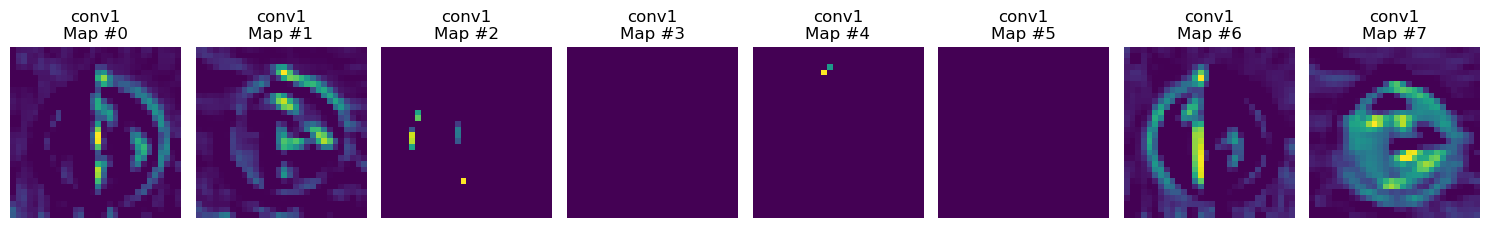

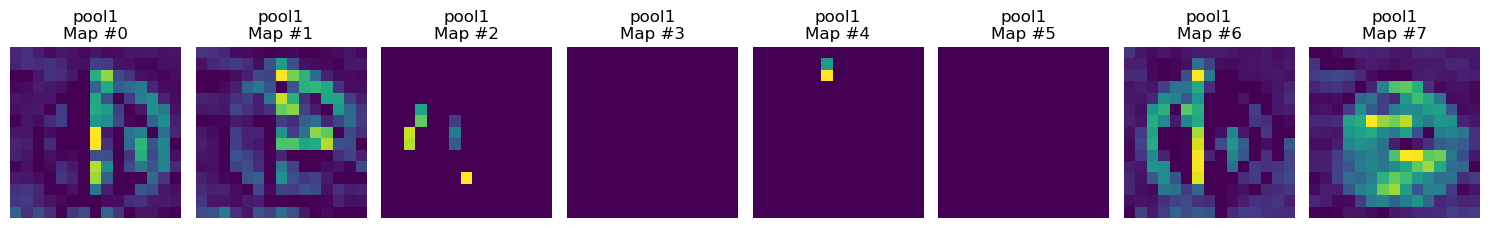

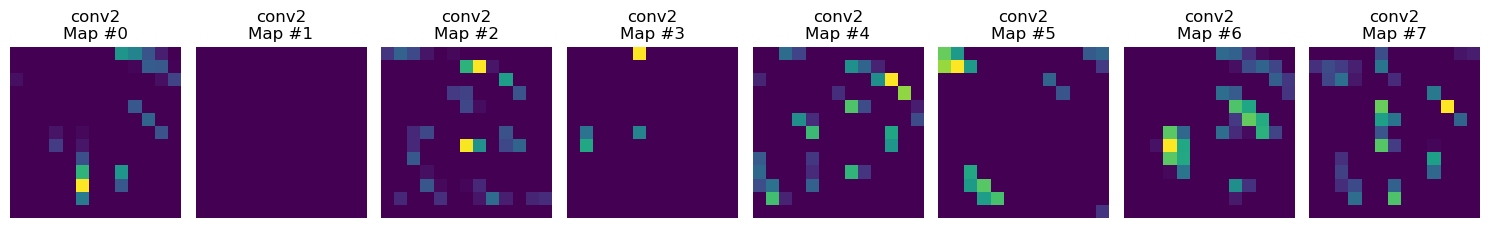

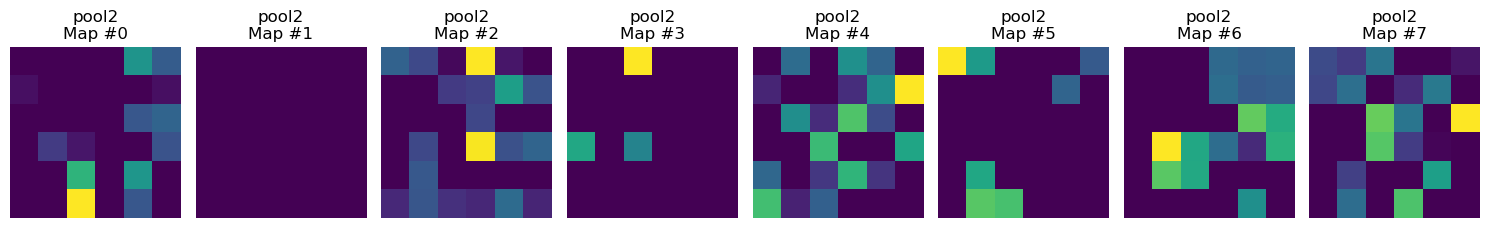

In [ ]:
# Choose one training image
sample_image = X_train[0]
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Create intermediate model
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get activations
activations = activation_model.predict(sample_image_expanded)

# Visualize


In [ ]:
def display_activation(activation, title, max_plots=8):
    plt.figure(figsize=(15, 5))
    n_features = min(max_plots, activation.shape[-1])
    for i in range(n_features):
        plt.subplot(1, n_features, i + 1)
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
        plt.title(f'{title}\nMap #{i}')
    plt.tight_layout()
    plt.show()

# Show activations
for layer, activation in zip([layer.name for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name], activations):
    display_activation(activation, layer)


🔍 Layer: input_layer | Shape: (1, 30, 30, 32)


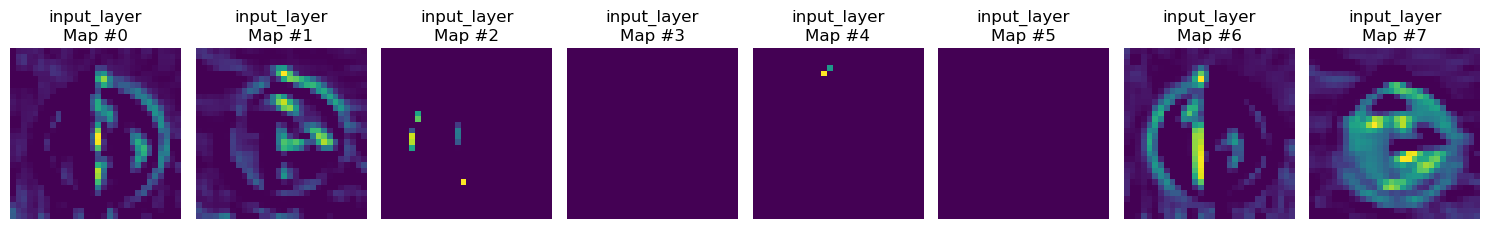

🔍 Layer: conv1 | Shape: (1, 15, 15, 32)


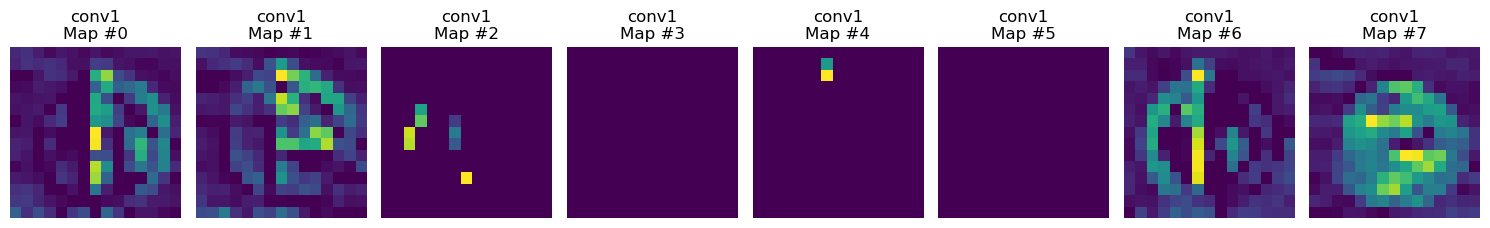

🔍 Layer: pool1 | Shape: (1, 13, 13, 64)


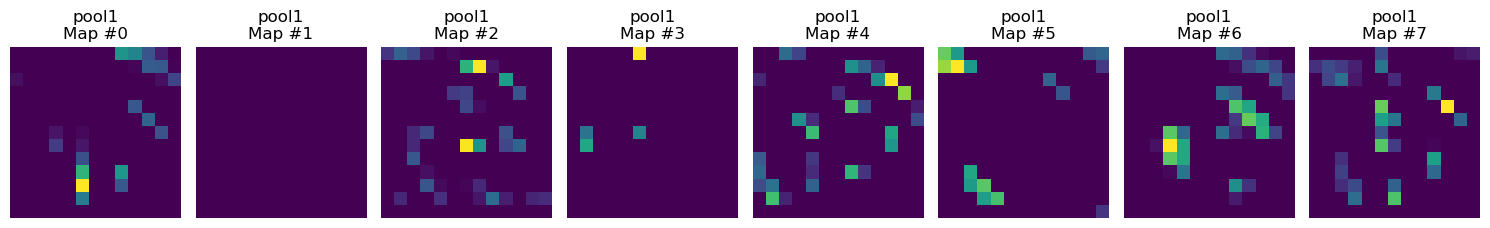

🔍 Layer: conv2 | Shape: (1, 6, 6, 64)


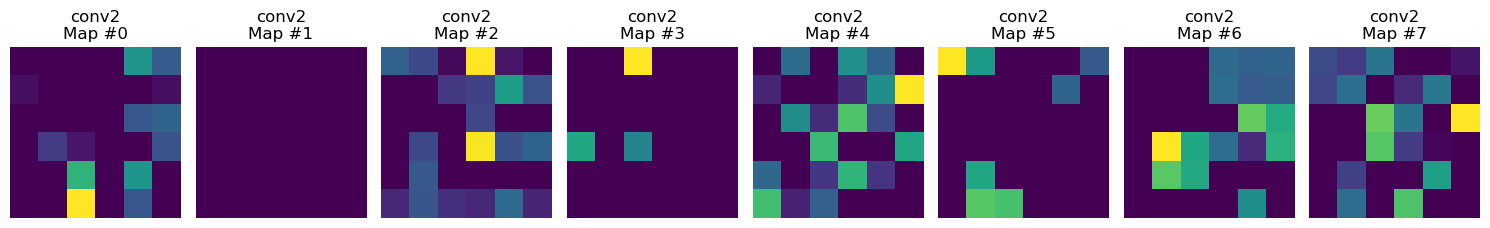

In [8]:
def display_activation(activation, title, max_plots=8):
    plt.figure(figsize=(15, 5))
    n_features = min(max_plots, activation.shape[-1])
    for i in range(n_features):
        plt.subplot(1, n_features, i + 1)
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
        plt.title(f'{title}\nMap #{i}')
    plt.tight_layout()
    plt.show()
# Visualize output of each layer properly based on shape
for layer, activation in zip(model.layers, activations):
    print(f"🔍 Layer: {layer.name} | Shape: {activation.shape}")
    
    # Conv or Pool layers (4D): visualize feature maps
    if len(activation.shape) == 4:
        display_activation(activation, layer.name)
    
    # Flatten/Dense layers (2D): visualize 1D activations
    elif len(activation.shape) == 2:
        # Flatten layer
        if 'flatten' in layer.name:
            plt.figure(figsize=(12, 3))
            plt.plot(activation[0])
            plt.title(f"{layer.name} (Flattened Features)")
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        
        # Dense or Output layer
        elif 'dense' in layer.name or 'output' in layer.name:
            plt.figure(figsize=(10, 3))
            plt.stem(activation[0], use_line_collection=True)
            plt.title(f"{layer.name} Activations")
            plt.xlabel("Neuron Index")
            plt.ylabel("Activation")
            plt.grid(True)
            plt.tight_layout()
            plt.show()


✅ Model Loaded Successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


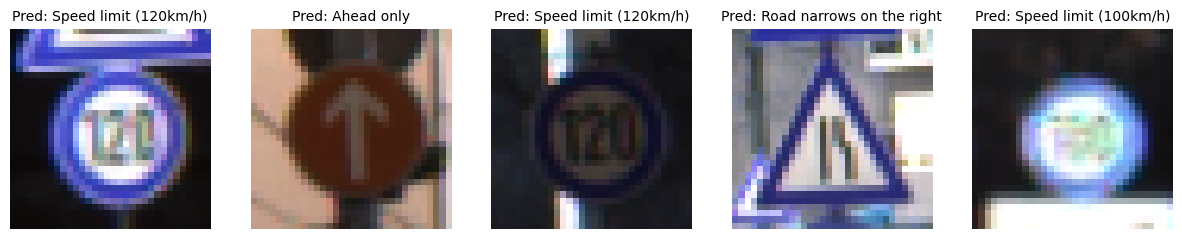

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import load_model

# Load the pre-trained model
model_path = r"D:\DL Project\traffic_sign_cnn.h5"
model = load_model(model_path)
print("✅ Model Loaded Successfully!")


num_images = 5
random_indices = random.sample(range(len(X_train)), num_images)

# Create a plot
plt.figure(figsize=(15, 5))

# Loop through random images
for i, idx in enumerate(random_indices):
    img_array = np.expand_dims(X_train[idx], axis=0)  # Add batch dimension
    img = X_train[idx]  # Grab the original image (no need to resize, it's already the right shape)
    
    # Normalize and predict
    pred = model.predict(img_array)
    predicted_class = np.argmax(pred)
    predicted_label = class_labels[predicted_class]

    # Plot the image
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)  # Directly use the training image
    plt.title(f"Pred: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.show()
